In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
tqdm.pandas()

from astropy.cosmology import FlatLambdaCDM
from astropy.coordinates import SkyCoord
import astropy.units as u

In [2]:
data_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/back-to-basics-data'
folder = 'C:/Users/oryan/Documents/mergers-in-cosmos'
student_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/followup-data'
results_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/back-to-basics-results'
cosmos_folder = 'E:/cosmos-data'

In [3]:
df_prim = pd.read_csv(f'{data_folder}/cosmos-primary-data.csv', index_col = 0)
df_sec = pd.read_csv(f'{data_folder}/cosmos-secondary-data.csv', index_col = 0)

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (592) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df_prim

,ID,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,FLUX_RADIUS,KRON_RADIUS,...,ez_ssfr_p025,ez_ssfr_p160,ez_ssfr_p500,ez_ssfr_p840,ez_ssfr_p975,ez_Av_p025,ez_Av_p160,ez_Av_p500,ez_Av_p840,ez_Av_p975
4000705532455,816891,150.679846,2.196543,9200.399414,21737.232422,0.000052,0.000059,-1.043282e-05,5.535906,3.50000,...,-8.931825e+00,-8.911355e+00,-8.899668e+00,-8.883307e+00,-8.872990e+00,0.529107,0.560142,0.599624,0.630920,0.652330
4000705532984,857121,150.673667,2.226291,9348.870117,22451.160156,0.000002,0.000004,1.265998e-08,8.876858,3.50000,...,-1.102382e+01,-1.082684e+01,-1.061214e+01,-1.008995e+01,-9.884142e+00,0.342150,0.435647,0.632192,0.834451,0.937351
4000705533312,873195,150.668102,2.242849,9482.499023,22848.505859,0.000007,0.000002,1.829277e-06,5.542504,3.50000,...,-1.036331e+01,-1.018712e+01,-1.005083e+01,-9.911050e+00,-9.815660e+00,1.108623,1.258513,1.362733,1.408040,1.445569
4000705533383,861738,150.645118,2.237538,10033.689453,22720.843750,0.000039,0.000078,1.332813e-05,5.169795,3.50000,...,-9.574272e+00,-9.548649e+00,-9.503962e+00,-9.439343e+00,-9.384205e+00,0.240042,0.281559,0.330791,0.384371,0.436491
4000705539529,1284864,149.686223,2.637412,33027.406250,32317.517578,0.000031,0.000030,1.244353e-06,6.412690,3.50000,...,-9.669377e+00,-9.614943e+00,-9.570104e+00,-9.533121e+00,-9.476167e+00,0.094187,0.114436,0.140990,0.159430,0.183608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6000535064806,1041748,150.435644,2.404769,15058.375977,26733.025391,0.000284,0.000249,1.584763e-05,3.683371,3.50000,...,-8.715841e+00,-8.601144e+00,-8.466426e+00,-8.338096e+00,-8.265055e+00,0.216840,0.269234,0.351659,0.400523,0.462082
6000535121007,997393,149.712229,2.359027,32405.687500,25635.718750,0.000051,0.000031,8.479790e-06,9.109251,3.50000,...,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,NaN,NaN,NaN,NaN,NaN
6000535781610,1231637,150.428931,2.588176,15220.276367,31134.923828,0.000496,0.000437,-8.376359e-05,3.791407,3.56554,...,-9.657442e+00,-9.606500e+00,-9.499937e+00,-9.339849e+00,-9.242270e+00,0.021844,0.021844,0.062948,0.119779,0.160169
6000535864481,1042682,150.505365,2.407106,13386.495117,26789.533203,0.011980,0.011985,-7.998707e-07,4.652697,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_prim_red = df_prim[['ID', 'lp_mass_best', 'ez_sfr', 'ez_z_phot', 'lp_zBEST']]
df_sec_red = df_sec[['Sec_ID', 'lp_mass_best', 'ez_sfr', 'ez_z_phot', 'lp_zBEST']]

In [6]:
df_sfrs_prim = df_prim_red[['ID', 'lp_mass_best', 'ez_sfr']]
df_sfrs_sec = df_sec_red[['Sec_ID', 'lp_mass_best', 'ez_sfr']]

In [7]:
df_zs_prim = df_prim_red[['ID', 'ez_z_phot', 'lp_zBEST']]
df_zs_sec = df_sec_red[['Sec_ID', 'ez_z_phot', 'lp_zBEST']]

In [8]:
def picking_z(ez_z, lp_z):
    if np.isnan(ez_z):
        if not np.isnan(lp_z):
            return lp_z
        else:
            return np.nan
    
    if np.isnan(lp_z):
        if not np.isnan(ez_z):
            return ez_z
        else:
            return np.nan
    
    if lp_z < ez_z:
        return lp_z
    elif ez_z <= lp_z:
        return ez_z
    else:
        return 'what'

In [9]:
df_z_prim = (
    df_zs_prim
    .assign(redshift = df_zs_prim.apply(lambda row: picking_z(row.ez_z_phot, row.lp_zBEST), axis = 1))
    .drop(columns = ['ez_z_phot', 'lp_zBEST'])
)
df_z_sec = (
    df_zs_sec
    .assign(redshift = df_zs_sec.apply(lambda row: picking_z(row.ez_z_phot, row.lp_zBEST), axis = 1))
    .drop(columns = ['ez_z_phot', 'lp_zBEST'])
)

In [10]:
df_z_prim

,ID,redshift
4000705532455,816891,0.519525
4000705532984,857121,0.219858
4000705533312,873195,0.302400
4000705533383,861738,0.619803
4000705539529,1284864,0.698400
...,...,...
6000535064806,1041748,1.091646
6000535121007,997393,11.935175
6000535781610,1231637,0.498800
6000535864481,1042682,1.440600


### Plotting Redshift Distributions

In [11]:
df_zs_merge = df_z_prim.merge(df_z_sec, left_index = True, right_index = True, how = 'left').dropna()
df_zs_merge.head()

,ID,redshift_x,Sec_ID,redshift_y
4000705532455,816891,0.519525,807207.0,0.519908
4000705532984,857121,0.219858,848644.0,0.219328
4000705533312,873195,0.302400,872228.0,0.300377
4000705533383,861738,0.619803,847365.0,0.621500
4000705539529,1284864,0.698400,1298521.0,0.698500


<AxesSubplot:xlabel='Primary Redshift', ylabel='Secondary Redshift'>

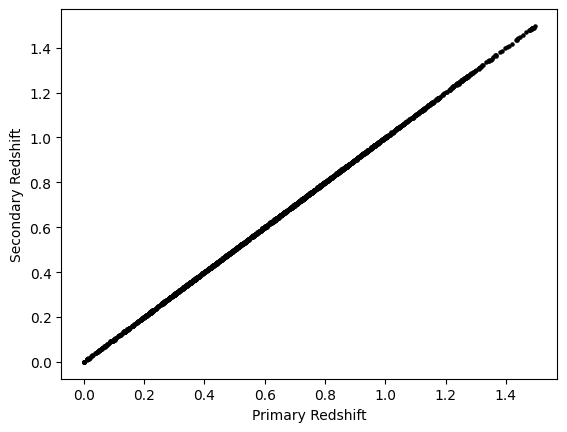

In [12]:
df_zs_merge.plot.scatter(
    x = 'redshift_x',
    y = 'redshift_y',
    xlabel = 'Primary Redshift',
    ylabel = 'Secondary Redshift',
    s=5,
    color='black'
)

### Looking at Projected Separations

In [15]:
coords_prim_df = df_prim[['ALPHA_J2000', 'DELTA_J2000']]
coords_sec_df = df_sec[['ALPHA_J2000', 'DELTA_J2000']]

In [21]:
coords_df = coords_prim_df.merge(coords_sec_df, left_index = True, right_index = True, how = 'left').dropna()

In [23]:
df_zs_merge

,ID,redshift_x,Sec_ID,redshift_y
4000705532455,816891,0.519525,807207.0,0.519908
4000705532984,857121,0.219858,848644.0,0.219328
4000705533312,873195,0.302400,872228.0,0.300377
4000705533383,861738,0.619803,847365.0,0.621500
4000705539529,1284864,0.698400,1298521.0,0.698500
...,...,...,...,...
6000516624203,888830,0.038598,886614.0,0.040759
6000518329781,1024564,0.369247,1010417.0,0.367000
6000518662663,575198,0.310400,591065.0,0.310550
6000535781610,1231637,0.498800,1241318.0,0.497069


In [24]:
coords_z_df = coords_df.merge(df_zs_merge, left_index = True, right_index = True, how = 'left')

In [120]:
coords_z_df

,ALPHA_J2000_x,DELTA_J2000_x,ALPHA_J2000_y,DELTA_J2000_y,ID,redshift_x,Sec_ID,redshift_y
4000705532455,150.679846,2.196543,150.676422,2.190766,816891,0.519525,807207.0,0.519908
4000705532984,150.673667,2.226291,150.663840,2.224324,857121,0.219858,848644.0,0.219328
4000705533312,150.668102,2.242849,150.671836,2.249021,873195,0.302400,872228.0,0.300377
4000705533383,150.645118,2.237538,150.634022,2.226784,861738,0.619803,847365.0,0.621500
4000705539529,149.686223,2.637412,149.683847,2.650479,1284864,0.698400,1298521.0,0.698500
...,...,...,...,...,...,...,...,...
6000516624203,150.443506,2.263871,150.431935,2.260288,888830,0.038598,886614.0,0.040759
6000518329781,150.579051,2.388898,150.565160,2.374175,1024564,0.369247,1010417.0,0.367000
6000518662663,150.421018,1.984436,150.431838,1.988318,575198,0.310400,591065.0,0.310550
6000535781610,150.428931,2.588176,150.434617,2.598058,1231637,0.498800,1241318.0,0.497069


In [39]:
cosmos = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

In [43]:
global cosmos

In [53]:
def calc_sep(ra1, dec1, ra2, dec2, z1, z2):
    d1 = cosmos.comoving_distance(z1).to(u.kpc)
    # d2 = cosmos.comoving_distance(z2).to(u.kpc)
    
    c1 = SkyCoord(ra = ra1 * u.deg, dec = dec1 * u.deg, frame = 'fk5', distance = d1)
    c2 = SkyCoord(ra = ra2 * u.deg, dec = dec2 * u.deg, frame = 'fk5', distance = d1)
    
    sep_3d = c1.separation_3d(c2)
    return np.float64(sep_3d / u.kpc)

In [61]:
def calc_sep_lum(ra1, dec1, ra2, dec2, z1, z2):
    d1 = cosmos.luminosity_distance(z1).to(u.kpc)
    # d2 = cosmos.comoving_distance(z2).to(u.kpc)
    
    c1 = SkyCoord(ra = ra1 * u.deg, dec = dec1 * u.deg, frame = 'fk5', distance = d1)
    c2 = SkyCoord(ra = ra2 * u.deg, dec = dec2 * u.deg, frame = 'fk5', distance = d1)
    
    sep_3d = c1.separation_3d(c2)
    return np.float64(sep_3d / u.kpc)

In [65]:
separation_df = (
    coords_z_df
    .assign(sep_comoving = coords_z_df.progress_apply(lambda row: calc_sep(row.ALPHA_J2000_x, row.DELTA_J2000_x, row.ALPHA_J2000_y, row.DELTA_J2000_y, row.redshift_x, row.redshift_y), axis = 1))

)

100%|██████████| 2945/2945 [00:05<00:00, 545.35it/s]


In [90]:
df_seps = separation_df[['ID', 'sep_comoving']]

### Looking at Total SFRs

In [72]:
df_sfrs_merge = df_sfrs_prim.merge(df_sfrs_sec, left_index=True, right_index = True, how = 'left').dropna()
df_sfrs_merge.head()

,ID,lp_mass_best_x,ez_sfr_x,Sec_ID,lp_mass_best_y,ez_sfr_y
4000705532455,816891,9.28590,0.589695,807207.0,8.90334,-1.096938
4000705532984,857121,10.49288,0.249006,848644.0,9.22598,-0.144180
4000705533312,873195,10.18078,0.333938,872228.0,7.30164,-1.975968
4000705533383,861738,9.36051,0.250086,847365.0,7.85616,-1.091657
4000705539529,1284864,10.17034,0.901761,1298521.0,11.11525,-1.303027


In [73]:
df_sfrs_quer_tmp = (
    df_sfrs_merge
    .query('lp_mass_best_x >= 6.5 & lp_mass_best_x <= 12.5 & ez_sfr_x > -3.5 & ez_sfr_x < 3.5')
)

In [74]:
df_sfrs_quer = (
    df_sfrs_quer_tmp
    .query('lp_mass_best_y >= 6.5 & lp_mass_best_y <= 12.5 & ez_sfr_y > -3.5 & ez_sfr_y < 3.5')
)

In [75]:
def scatter_hist(x, y, ax, ax_histx, ax_histy, colour):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y, s = 0.5, color=colour, alpha = 0.5)
    sns.kdeplot(x=x,y=y, ax=ax, thresh = 0.05, levels = 8)
    ax.set_xlim([6.5,12.5])
    ax.set_ylim([-5, 4])

    # now determine nice limits by hand:
    binwidth = 0.15
    xymax = max(12.5, 3.5)
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins, histtype = 'step', color = colour)
    ax_histy.hist(y, bins=bins, orientation='horizontal', histtype='step', color=colour)

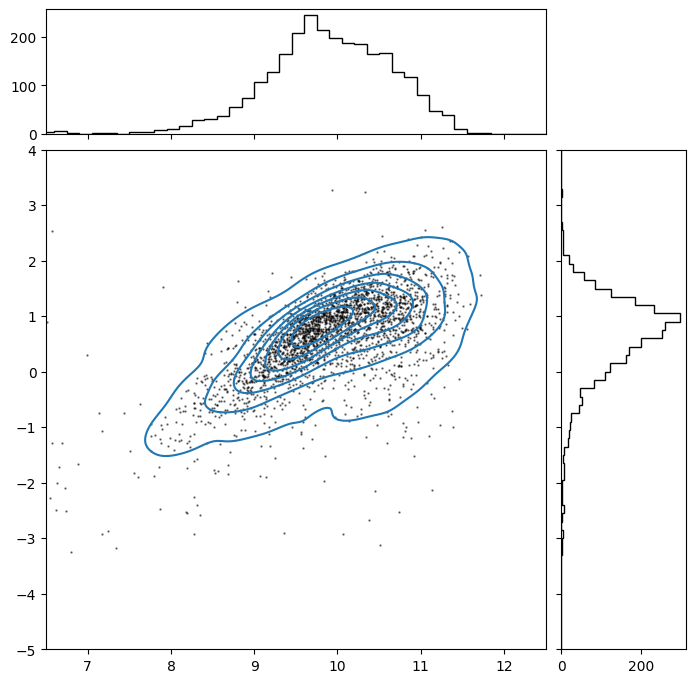

In [76]:
fig = plt.figure(figsize = (8,8))
gs = fig.add_gridspec(2,2, width_ratios = (4,1), height_ratios = (1,4), left = 0.1, right = 0.9, bottom = 0.1, top = 0.9, wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1,0])
ax_histx = fig.add_subplot(gs[0,0],sharex=ax)
ax_histy = fig.add_subplot(gs[1,1],sharey=ax)

# colours = ['black','blue','red','orange']

scatter_hist(np.array(list(df_sfrs_quer.lp_mass_best_x)), np.array(list(df_sfrs_quer.ez_sfr_x)), ax, ax_histx, ax_histy, 'black')

In [77]:
def scatter_hist_2(x, y, ax, ax_histx, ax_histy, colour):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y, s = 0.5, color=colour, alpha = 0.5)
    sns.kdeplot(x=x,y=y, ax=ax, thresh = 0.11, levels = 8, color='red')
    ax.set_xlim([6.5,12.5])
    ax.set_ylim([-5, 4])

    # now determine nice limits by hand:
    binwidth = 0.15
    xymax = max(12.5, 3.5)
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins, histtype = 'step', color = colour)
    ax_histy.hist(y, bins=bins, orientation='horizontal', histtype='step', color=colour)

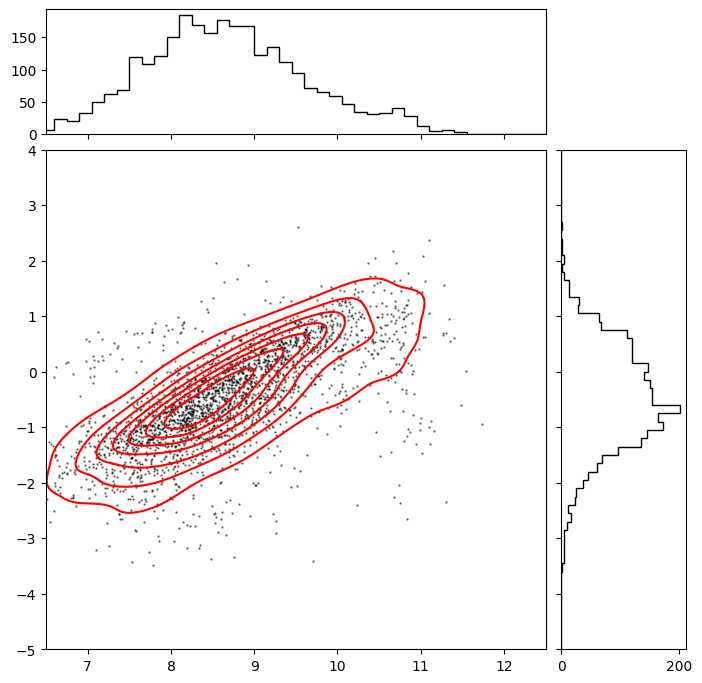

In [78]:
fig = plt.figure(figsize = (8,8))
gs = fig.add_gridspec(2,2, width_ratios = (4,1), height_ratios = (1,4), left = 0.1, right = 0.9, bottom = 0.1, top = 0.9, wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1,0])
ax_histx = fig.add_subplot(gs[0,0],sharex=ax)
ax_histy = fig.add_subplot(gs[1,1],sharey=ax)

# colours = ['black','blue','red','orange']

scatter_hist_2(np.array(list(df_sfrs_quer.lp_mass_best_y)), np.array(list(df_sfrs_quer.ez_sfr_y)), ax, ax_histx, ax_histy, 'black')

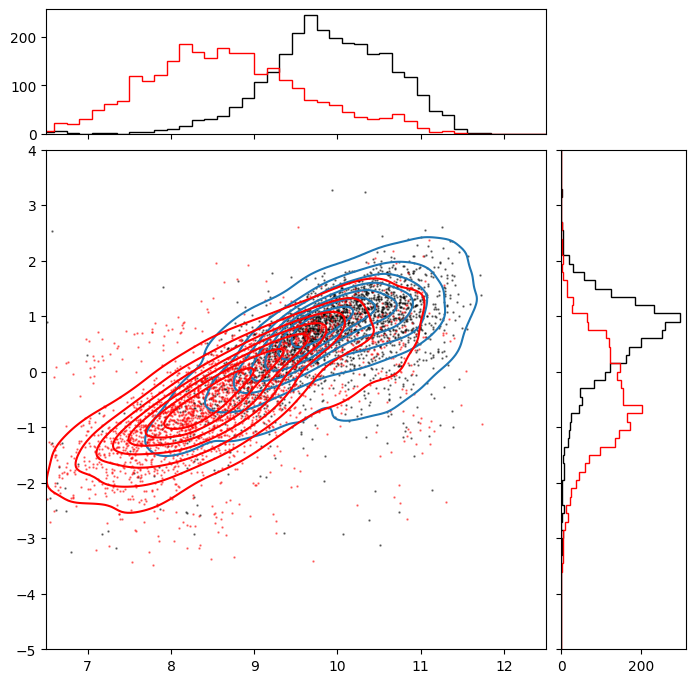

In [79]:
fig = plt.figure(figsize = (8,8))
gs = fig.add_gridspec(2,2, width_ratios = (4,1), height_ratios = (1,4), left = 0.1, right = 0.9, bottom = 0.1, top = 0.9, wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1,0])
ax_histx = fig.add_subplot(gs[0,0],sharex=ax)
ax_histy = fig.add_subplot(gs[1,1],sharey=ax)

# colours = ['black','blue','red','orange']

scatter_hist(np.array(list(df_sfrs_quer.lp_mass_best_x)), np.array(list(df_sfrs_quer.ez_sfr_x)), ax, ax_histx, ax_histy, 'black')
scatter_hist_2(np.array(list(df_sfrs_quer.lp_mass_best_y)), np.array(list(df_sfrs_quer.ez_sfr_y)), ax, ax_histx, ax_histy, 'red')

### Linking with Projection

In [91]:
df_seps_sfr = df_seps.merge(df_sfrs_quer, left_index = True, right_index = True)

In [92]:
def add_logs(logx1, logx2):
    x1 = 10**logx1
    x2 = 10**logx2
    x = x1 + x2
    return np.log10(x)

In [107]:
df_added = (
    df_seps_sfr
    .assign(tot_sfr = df_seps_sfr.apply(lambda row: add_logs(row.ez_sfr_x, row.ez_sfr_y), axis = 1))
    .assign(tot_mass = df_seps_sfr.apply(lambda row: add_logs(row.lp_mass_best_x, row.lp_mass_best_y), axis = 1))
)

In [121]:
df_added.head()

,ID_x,sep_comoving,ID_y,lp_mass_best_x,ez_sfr_x,Sec_ID,lp_mass_best_y,ez_sfr_y,tot_sfr,tot_mass
4000705532455,816891,228.762930,816891,9.28590,0.589695,807207.0,8.90334,-1.096938,0.598541,9.436478
4000705532984,857121,156.147295,857121,10.49288,0.249006,848644.0,9.22598,-0.144180,0.396497,10.515757
4000705533312,873195,151.461933,873195,10.18078,0.333938,872228.0,7.30164,-1.975968,0.336060,10.181353
4000705533383,861738,611.145324,861738,9.36051,0.250086,847365.0,7.85616,-1.091657,0.269420,9.373898
4000705539529,1284864,579.706799,1284864,10.17034,0.901761,1298521.0,11.11525,-1.303027,0.904463,11.161950


<AxesSubplot:xlabel='Comoving Separation', ylabel='Total SFR'>

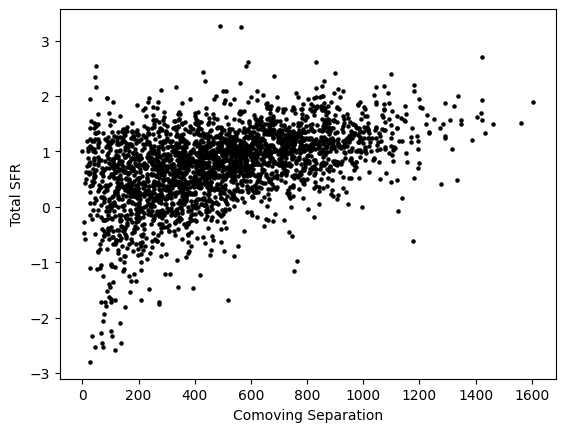

In [109]:
df_added.plot.scatter(
    x = 'sep_comoving',
    y = 'tot_sfr',
    s = 5,
    color = 'black',
    xlabel = 'Comoving Separation',
    ylabel = 'Total SFR'
)

<AxesSubplot:xlabel='Comoving Separation', ylabel='Total SFR'>

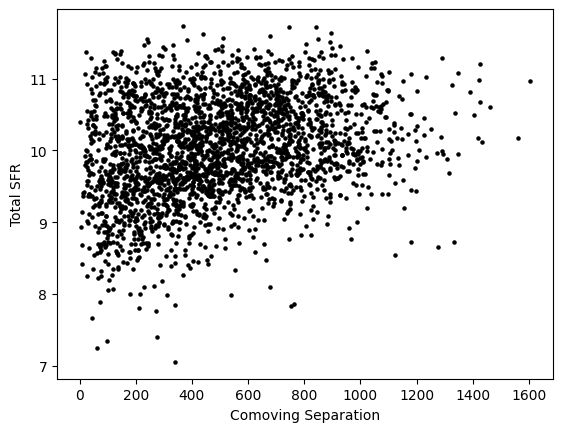

In [110]:
df_added.plot.scatter(
    x = 'sep_comoving',
    y = 'tot_mass',
    s = 5,
    color = 'black',
    xlabel = 'Comoving Separation',
    ylabel = 'Total SFR'
)

In [112]:
df_stages = pd.read_csv(f'{data_folder}/source-stage.csv', index_col = 0)

In [116]:
df_added_stages = df_added.merge(df_stages, left_index = True, right_on ='SourceID', how = 'left')

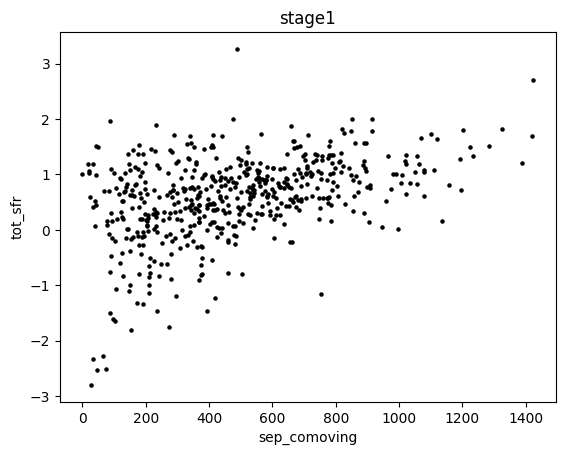

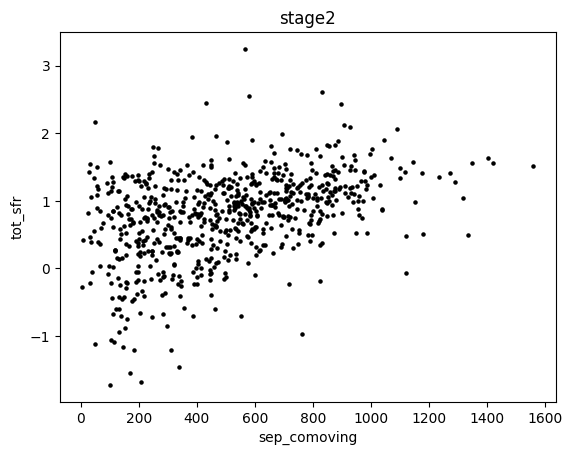

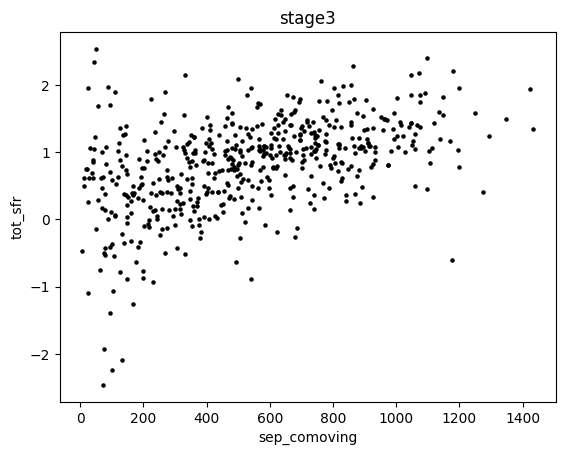

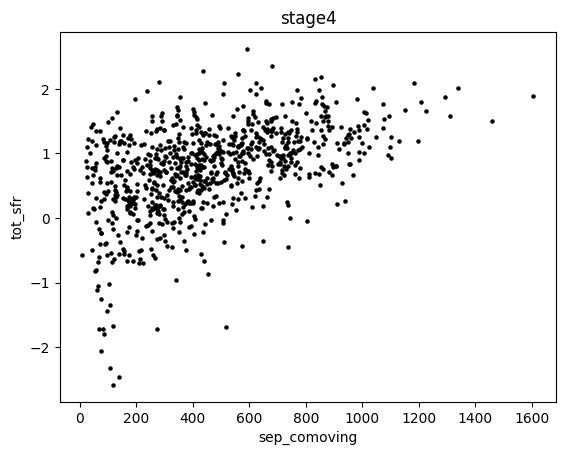

In [119]:
for i in range(4):
    df_added_stages.query(f'category == "stage{i+1}"').plot.scatter(
        x = 'sep_comoving',
        y = 'tot_sfr',
        s = 5,
        color = 'black',
        title = f'stage{i+1}'
    )
    plt.show()

### Combining Distributions

In [81]:
def add_logs(logx1, logx2):
    x1 = 10**logx1
    x2 = 10**logx2
    x = x1 + x2
    return np.log10(x)

In [83]:
df_tot = (
    df_sfrs_quer
    .assign(tot_mass = df_sfrs_quer.apply(lambda row: add_logs(row.lp_mass_best_x, row.lp_mass_best_y), axis = 1))
    .assign(tot_sfr = df_sfrs_quer.apply(lambda row: add_logs(row.ez_sfr_x, row.ez_sfr_y), axis = 1))
)

<AxesSubplot:xlabel='Log(LaPhare Mass)', ylabel='Log(EAzY SFR)'>

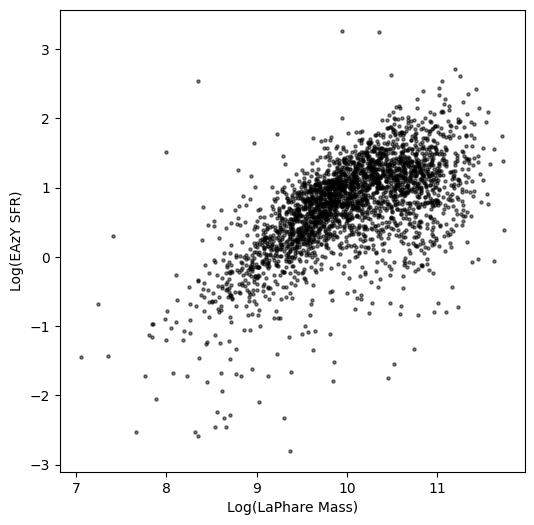

In [87]:
df_tot.plot.scatter(
    x = 'tot_mass',
    y = 'tot_sfr',
    s = 5,
    color = 'black',
    alpha = 0.5,
    xlabel = 'Log(LaPhare Mass)',
    ylabel = 'Log(EAzY SFR)',
    figsize = (6,6),
)

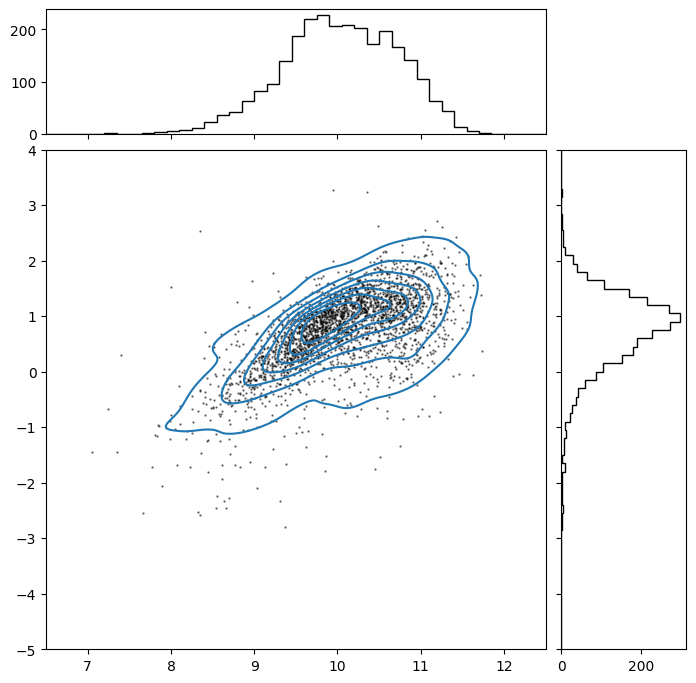

In [88]:
fig = plt.figure(figsize = (8,8))
gs = fig.add_gridspec(2,2, width_ratios = (4,1), height_ratios = (1,4), left = 0.1, right = 0.9, bottom = 0.1, top = 0.9, wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1,0])
ax_histx = fig.add_subplot(gs[0,0],sharex=ax)
ax_histy = fig.add_subplot(gs[1,1],sharey=ax)

# colours = ['black','blue','red','orange']

scatter_hist(np.array(list(df_tot.tot_mass)), np.array(list(df_tot.tot_sfr)), ax, ax_histx, ax_histy, 'black')

### Combining with Stages

In [89]:
df_stages = pd.read_csv(f'{data_folder}/source-stage.csv', index_col = 0)

In [91]:
df_tot.head()

,ID,lp_mass_best_x,ez_sfr_x,Sec_ID,lp_mass_best_y,ez_sfr_y,tot_mass,tot_sfr
4000705532455,816891,9.28590,0.589695,807207.0,8.90334,-1.096938,9.436478,0.598541
4000705532984,857121,10.49288,0.249006,848644.0,9.22598,-0.144180,10.515757,0.396497
4000705533312,873195,10.18078,0.333938,872228.0,7.30164,-1.975968,10.181353,0.336060
4000705533383,861738,9.36051,0.250086,847365.0,7.85616,-1.091657,9.373898,0.269420
4000705539529,1284864,10.17034,0.901761,1298521.0,11.11525,-1.303027,11.161950,0.904463


In [96]:
df_comb_stages = (
    df_tot
    .merge(df_stages, left_index = True, right_on='SourceID', how = 'left')
    .dropna()
)

In [97]:
df_comb_stages

,ID,lp_mass_best_x,ez_sfr_x,Sec_ID,lp_mass_best_y,ez_sfr_y,tot_mass,tot_sfr,SourceID,category
22.0,857121,10.49288,0.249006,848644.0,9.22598,-0.144180,10.515757,0.396497,4000705532984,stage1
23.0,873195,10.18078,0.333938,872228.0,7.30164,-1.975968,10.181353,0.336060,4000705533312,stage3
24.0,861738,9.36051,0.250086,847365.0,7.85616,-1.091657,9.373898,0.269420,4000705533383,stage1
26.0,1284864,10.17034,0.901761,1298521.0,11.11525,-1.303027,11.161950,0.904463,4000705539529,stage1
29.0,1301817,8.79527,-0.660533,1292389.0,7.51188,-1.061591,8.817316,-0.515294,4000705540005,stage3
...,...,...,...,...,...,...,...,...,...,...
21654.0,519723,10.14450,1.624828,502958.0,9.54223,0.079657,10.241368,1.637032,6000513100505,stage3
21677.0,1144439,6.74068,-2.504758,1160760.0,8.31603,-0.711767,8.327425,-0.704827,6000513464483,stage2
21748.0,1024564,6.54443,-2.273880,1010417.0,8.89881,-0.381544,8.900726,-0.376015,6000518329781,stage4
21749.0,575198,11.23521,-0.960728,591065.0,7.37976,-1.094968,11.235271,-0.721651,6000518662663,stage2


In [110]:
def scatter_hist(x, y, ax, ax_histx, ax_histy, colour):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y, s = 0.5, color=colour, alpha = 0.5)
    sns.kdeplot(x=x,y=y, ax=ax, thresh = 0.09, levels = 7)
    ax.set_xlim([6.5,12.5])
    ax.set_ylim([-5, 4])

    # now determine nice limits by hand:
    binwidth = 0.15
    xymax = max(12.5, 3.5)
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins, histtype = 'step', color = colour)
    ax_histy.hist(y, bins=bins, orientation='horizontal', histtype='step', color=colour)

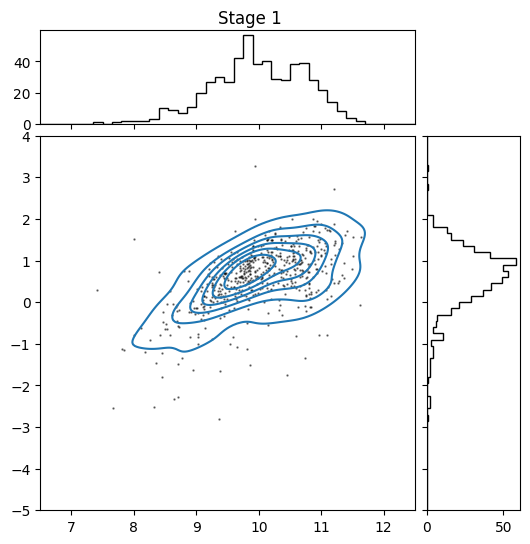

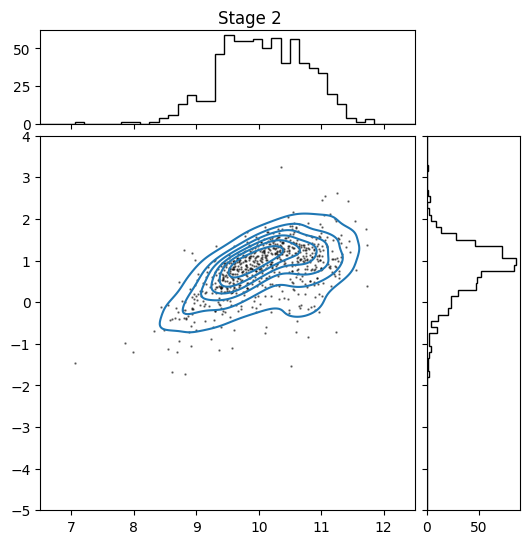

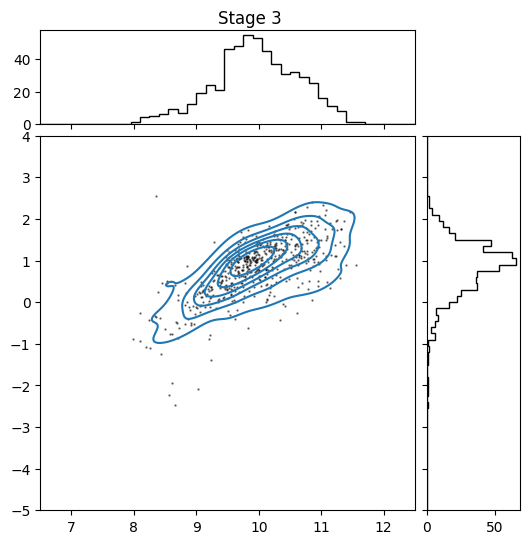

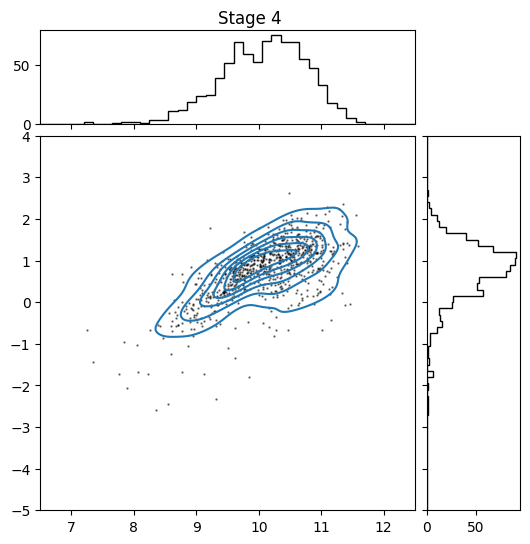

In [111]:
# colours = ['black','blue','red','orange']

for i in range(0,4):
    
    fig = plt.figure(figsize = (6,6))
    gs = fig.add_gridspec(2,2, width_ratios = (4,1), height_ratios = (1,4), left = 0.1, right = 0.9, bottom = 0.1, top = 0.9, wspace=0.05, hspace=0.05)

    ax = fig.add_subplot(gs[1,0])
    ax_histx = fig.add_subplot(gs[0,0],sharex=ax)
    ax_histy = fig.add_subplot(gs[1,1],sharey=ax)
    
    df_stage = df_comb_stages.query(f'category == "stage{i+1}"')

    scatter_hist(np.array(list(df_stage.tot_mass)), np.array(list(df_stage.tot_sfr)), ax, ax_histx, ax_histy, 'black')
    
    fig.text(0.45, 0.92, f'Stage {i + 1}', ha='center', va='center', fontsize = 12)
    
    # plt.savefig(f'{results_folder}/stage{i+1}.jpeg', bbox_inches = 'tight', dpi = 100)
    
    plt.show()